In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns

In [35]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')


I dropped the rows that included information that we will not use for modeling. The rows dropped were 0,1,2,3,353,354, and 355.
Not sure why there is an extra unidentified column, but we can ignore as we will not be using it.

In [36]:
df.columns = ['city','population','violent_crime','murder','rape_revised','rape_legacy','robbery','aggravated_assault','property_crime','burglary','larceny_theft','vehicle_theft','arson', '?']
df.drop(labels= [0,1,2,3, 353,353,354], axis = 0, inplace = True)

In [42]:
df = df[['murder','population','property_crime','robbery']]

Here I getting rid of the commas in between our numbers by replacing them with nothing.

In [46]:
columns = list(df.columns)
for column in columns:
    df[column] = df[column].str.replace(',', '')

In [47]:
df.head()

,murder,population,property_crime,robbery
4,0,1861,12,0
5,0,2577,24,0
6,0,2846,16,0
7,8,97956,4090,227
8,0,6388,223,4


I converted the string values to numeric in order to use them for calcululations.

In [57]:
df = df.apply(pd.to_numeric)

We want to create out multivariable regression equation. Population is already set for us, now it has no commas and has numeric values. I will square the population values, then use binary numbers 0 and 1 for robbery and murder. 0 crime and robbery values will remain 0 while anything above 0 will be 1.

In [59]:
#Property crime = alpha + Population + Population^2 + Murder + Robbery
df['population_squared'] = df['population']**2
df['murder'] = df['murder'].apply(lambda x: 0 if x <= 0 else 1)
df['robbery'] = df['robbery'].apply(lambda x: 0 if x <= 0 else 1)

df.dropna(inplace = True)
df.head()

,murder,population,property_crime,robbery,population_squared
4,0,1861.0,12.0,0,3.463321e+06
5,0,2577.0,24.0,0,6.640929e+06
6,0,2846.0,16.0,0,8.099716e+06
7,1,97956.0,4090.0,1,9.595378e+09
8,0,6388.0,223.0,1,4.080654e+07


In [60]:
df.describe()

,murder,population,property_crime,robbery,population_squared
count,348.000000,3.480000e+02,348.000000,348.000000,3.480000e+02
mean,0.140805,4.003763e+04,792.606322,0.600575,2.035547e+11
std,0.348321,4.500374e+05,7659.724746,0.490486,3.778876e+12
min,0.000000,5.260000e+02,0.000000,0.000000,2.766760e+05
25%,0.000000,3.003000e+03,40.500000,0.000000,9.018117e+06
50%,0.000000,7.233500e+03,112.500000,1.000000,5.232568e+07
75%,0.000000,1.842750e+04,341.000000,1.000000,3.397536e+08
max,1.000000,8.396126e+06,141971.000000,1.000000,7.049493e+13


c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


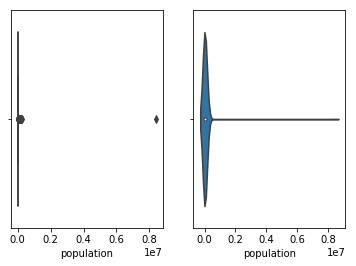

In [61]:
plt.subplot(121)
population = sns.boxplot(df['population'])
plt.subplot(122)
population = sns.violinplot(df['population'])

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


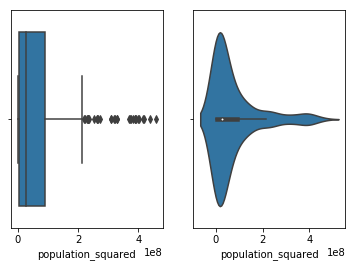

In [67]:
plt.subplot(121)
population_squared = sns.boxplot(df['population_squared'])
plt.subplot(122)
population_squared = sns.violinplot(df['population_squared'])

In [68]:
columns = list(df[['population','population_squared']].columns)
for column in columns: 
    q25 = df[column].quantile(0.25)
    q75 = df[column].quantile(0.75)
    iqr = q75 - q25
    max = q75 + (iqr * 1.5)
    df=df.where(df[column] < max)

The 'population' values had extreme outliers. We will excluded those values.

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


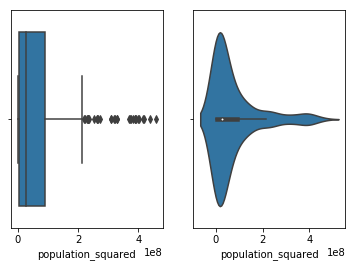

In [66]:
plt.subplot(121)
population_squared = sns.boxplot(df['population_squared'])
plt.subplot(122)
population = sns.violinplot(df['population_squared'])